In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action= 'ignore')

In [5]:
satislar = pd.read_csv('satislar.csv')
df = satislar.copy()
df.head()

,Aylar,Satislar
0,8,19671.5
1,10,23102.5
2,11,18865.5
3,13,21762.5
4,14,19945.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Aylar     30 non-null     int64  
 1   Satislar  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [7]:
df.isnull().sum()

Aylar       0
Satislar    0
dtype: int64

## Basit Linear Regression (Simple Linear Regression)

In [160]:
# Bagimli ve Bagimsiz Degisken Atamasi

X = df[['Aylar']]
y = df[['Satislar']]

In [187]:
# Train Test 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [188]:
# Verilerin Standartizasyonu 

'''
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
y_train = sc.fit_transform(y_train)
y_test = sc.fit_transform(y_test)
'''
X_test.head()

,Aylar
2,11
28,64
13,26
10,25
26,59


In [189]:
X_train.head()

,Aylar
5,19
16,32
8,20
14,29
23,50


In [190]:
# Linear Regression objesi olusturma

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Fit etmek
lr.fit(X_train, y_train)

# Tahmin 
tahmin = lr.predict(X_test)
tahmin

array([[20126.21865404],
       [57740.29412655],
       [30771.7117123 ],
       [30062.01217508],
       [54191.79644047],
       [50643.29875438],
       [54191.79644047],
       [30062.01217508],
       [36449.30801003],
       [47094.80106829]])

In [191]:
# Hatalar

print(tahmin - y_test)

       Satislar
2   1260.718654
28 -3455.205873
13  2231.211712
10 -1546.987825
26 -4292.703560
24 -4072.201246
27 -2125.703560
11  2165.012175
17 -5094.691990
22 -3556.198932


### Verinin Gorsellestirmesi

    Aylar
5      19
16     32
8      20
14     29
23     50


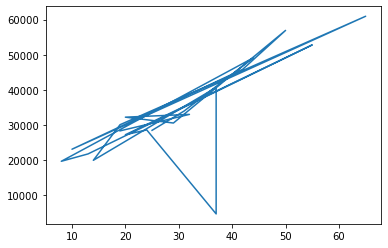

In [192]:
# Verinin orjinel halinin gorseli
#  ama hepsi cizilmiyor , sadece trainler ciziliyor
# Grafik sacmaliyor cunku once 19. ayi ciziyor , sonra 32 sira ile cizmiyor sort etmek lazim

plt.plot(X_train, y_train);

print(X_train[0:5])

   Aylar
0      8
1     10
3     13    Satislar
0   19671.5
1   23102.5
3   21762.5


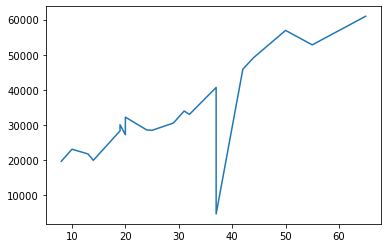

In [193]:
plt.plot(X_train.sort_index(), y_train.sort_index());

print(X_train.sort_index()[0:3], y_train.sort_index()[0:3])

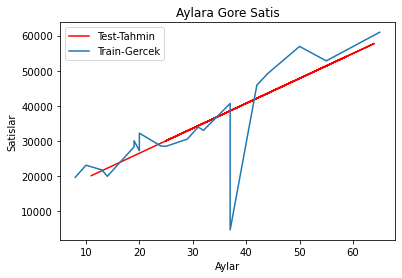

In [194]:
# X_train e karsilik gelen Tahminlerin cizilmesi
#plt.legen(loc='best') Label icin olmak zorunda, yoksa Labellar gozukmuyor

plt.plot(X_test, lr.predict(X_test), 'red',label= 'Test-Tahmin')
plt.plot(X_train.sort_index(), y_train.sort_index(), label= 'Train-Gercek')
plt.legend(loc="best")
plt.title('Aylara Gore Satis')
plt.xlabel('Aylar')
plt.ylabel('Satislar')
plt.show();

In [185]:
X_test

,Aylar
7,20
29,65
5,19
26,59
8,20
27,59
12,25
21,44
11,25
23,50


In [186]:
lr.predict(X_test)

array([[25843.0635055 ],
       [58434.15156647],
       [25118.81710415],
       [54088.67315834],
       [25843.0635055 ],
       [54088.67315834],
       [29464.29551228],
       [43224.97713802],
       [29464.29551228],
       [47570.45554615]])